51
0
100
0
105
256


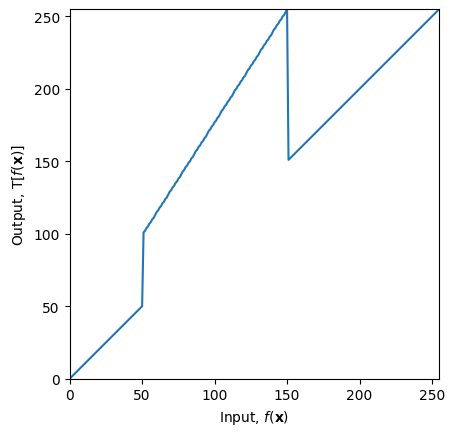

In [1]:
%matplotlib inline
import numpy as np
import matplotlib.pyplot as plt
import cv2 as cv

c=np.array([(50,50),(50,100),(150,255),(150,150),(255,255)])

t1=np.linspace(0,c[0,1],c[0,0]+1-0).astype('uint8')
print(len(t1))
t2=np.linspace(c[0,1]+1,c[1,1],c[1,0]-c[0,0]).astype('uint8')
print(len(t2))
t3=np.linspace(c[1,1]+1,c[2,1],c[2,0]-c[1,0]).astype('uint8')
print(len(t3))
t4=np.linspace(c[2,1]+1,c[3,1],c[3,0]-c[2,0]).astype('uint8')
print(len(t4))
t5=np.linspace(c[3,1]+1,c[4,1],c[4,0]-c[3,0]).astype('uint8')
print(len(t5))

transform=np.concatenate((t1,t2),axis=0).astype('uint8')
transform=np.concatenate((transform,t3),axis=0).astype('uint8')
transform=np.concatenate((transform,t4),axis=0).astype('uint8')
transform=np.concatenate((transform,t5),axis=0).astype('uint8')
print(len(transform))

fig,ax=plt.subplots()
ax.plot(transform)
ax.set_xlabel(r'Input, $f(\mathbf{x})$')
ax.set_ylabel('Output, $\mathrm{T}[f(\mathbf{x})]$')
ax.set_xlim(0,255)
ax.set_ylim(0,255)
ax.set_aspect('equal') 
plt.show()

img_orig = cv.imread('emma.jpg', cv.IMREAD_GRAYSCALE)
cv.namedWindow("Image", cv.WINDOW_AUTOSIZE)
cv.imshow("Image", img_orig)
cv.waitKey(0)
image_transformed = cv.LUT(img_orig, transform)
cv.imshow("Image", image_transformed)
cv.waitKey(0)
cv.destroyAllWindows()


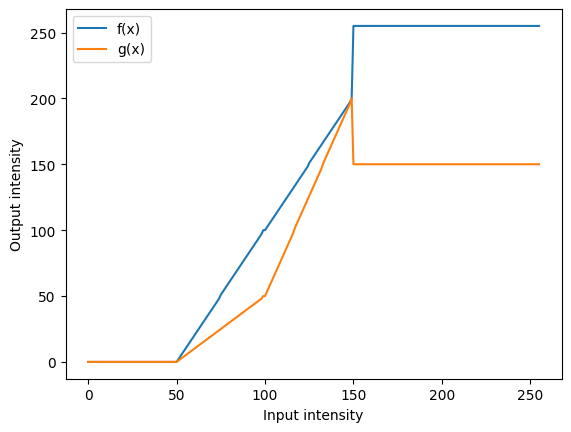

In [2]:
import numpy as np
import matplotlib.pyplot as plt
import cv2 as cv

# Define the transformation function f(x) to accentuate the white matter
f = np.zeros(256, dtype=np.uint8)
f[:50] = 0
f[50:100] = np.linspace(0, 100, 50)
f[100:150] = np.linspace(100, 200, 50)
f[150:] = 255

# Define the transformation function g(x) to accentuate the gray matter
g = np.zeros(256, dtype=np.uint8)
g[:50] = 0
g[50:100] = np.linspace(0, 50, 50)
g[100:150] = np.linspace(50, 200, 50)
g[150:] = 150

# Plot the transformation functions
fig, ax = plt.subplots()
ax.plot(f, label='f(x)')
ax.plot(g, label='g(x)')
ax.set_xlabel('Input intensity')
ax.set_ylabel('Output intensity')
ax.legend()
plt.show()

# Read the image in grayscale mode
img_orig = cv.imread('BrainProtonDensitySlice9.png', cv.IMREAD_GRAYSCALE)

# Apply the transformation functions to the image
img_f = cv.LUT(img_orig, f)
img_g = cv.LUT(img_orig, g)

# Display the original and transformed images[^2^][2]
cv.imshow('Original', img_orig)
cv.imshow('White matter accentuated', img_f)
cv.imshow('Gray matter accentuated', img_g)
cv.waitKey(0)
cv.destroyAllWindows()


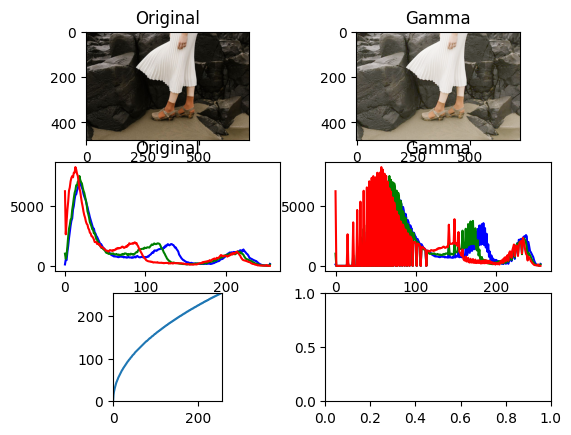

In [3]:
%matplotlib inline
import numpy as np
import matplotlib.pyplot as plt
import cv2 as cv

img_original=cv.imread('highlights_and_shadows.jpg',cv.IMREAD_COLOR)
gamma=2
table=np.array([((i/255.0)**(1/gamma))*255.0 for i in np.arange(0,256)]).astype('uint8')
img_gamma=cv.LUT(img_original,table)
img_original=cv.cvtColor(img_original,cv.COLOR_BGR2RGB)
img_gamma=cv.cvtColor(img_gamma,cv.COLOR_BGR2RGB)
f,axarr=plt.subplots(3,2)
axarr[0,0].imshow(img_original)
axarr[0,0].set_title('Original')
axarr[0,1].imshow(img_gamma)
axarr[0,1].set_title('Gamma')
color=('b','g','r')
for i,c in enumerate(color):
    hist_original=cv.calcHist([img_original],[i],None,[256],[0,256])
    axarr[1,0].plot(hist_original,color=c)
    axarr[1,0].set_title('Original')

    hist_gamma=cv.calcHist([img_gamma],[i],None,[256],[0,256])
    axarr[1,1].plot(hist_gamma,color=c)
    axarr[1,1].set_title('Gamma')

axarr[2,0].plot(table)
axarr[2,0].set_xlim([0,255])
axarr[2,0].set_ylim([0,255])
axarr[2,0].set_aspect('equal')

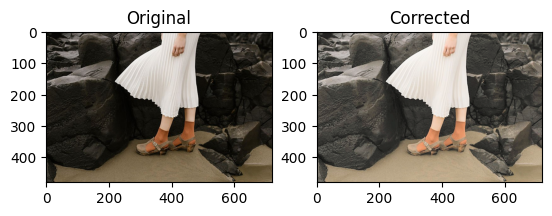

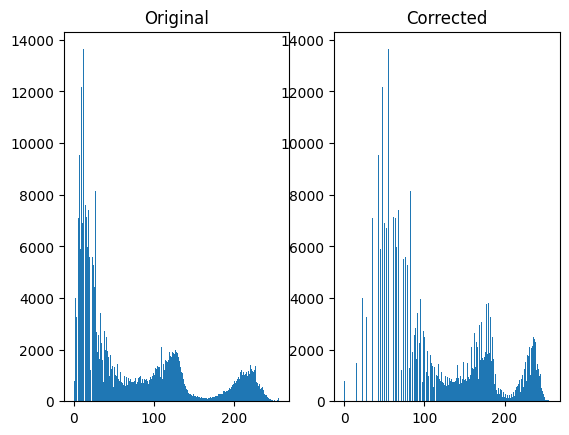

In [4]:
%matplotlib inline
import numpy as np
import matplotlib.pyplot as plt
import cv2 as cv

img_original=cv.imread('highlights_and_shadows.jpg',cv.IMREAD_COLOR)
img_Lab=cv.cvtColor(img_original,cv.COLOR_BGR2LAB)
L,a,b=cv.split(img_Lab)
gamma=2
L_new=np.array(255*(L/255)**(1/gamma),dtype='uint8')
img_new_L=cv.merge((L_new,a,b))
img_new=cv.cvtColor(img_new_L,cv.COLOR_LAB2BGR)

plt.subplot(121), plt.imshow(cv.cvtColor(img_original, cv.COLOR_BGR2RGB)), plt.title('Original')
plt.subplot(122), plt.imshow(cv.cvtColor(img_new, cv.COLOR_BGR2RGB)), plt.title('Corrected')
plt.show()

plt.subplot(121), plt.hist(L.ravel(), 256, [0, 256]), plt.title('Original')
plt.subplot(122), plt.hist(L_new.ravel(), 256, [0, 256]), plt.title('Corrected')
plt.show()


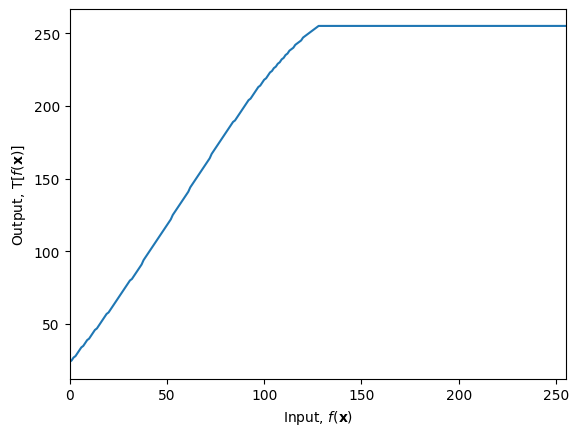

"\nplt.subplot(121), plt.imshow(cv.cvtColor(img_original, cv.COLOR_BGR2RGB)), plt.title('Original')\nplt.subplot(122), plt.imshow(cv.cvtColor(img_new, cv.COLOR_BGR2RGB)), plt.title('Vibrance-enhanced image')\nplt.show()\n\nplt.subplot(121), plt.hist(s.ravel(), 256, [0, 256]), plt.title('Original')\nplt.subplot(122), plt.hist(s_new.ravel(), 256, [0, 256]), plt.title('Corrected')\nplt.show()\n"

In [32]:
%matplotlib inline
import numpy as np
import matplotlib.pyplot as plt
import cv2 as cv

img_original=cv.imread('spider.png',cv.IMREAD_COLOR)
img_hsv=cv.cvtColor(img_original,cv.COLOR_BGR2HSV)

#Split the image into hue, saturation, and value planes
h,s,v=cv.split(img_hsv)

#intensity transformation given
def intensity_transformation(x,sigma,a):
    return np.minimum(x+a*128*(np.exp(-(x-128)**2/(2*sigma**2))),255).astype('uint8')

#apply the transformation to the saturation plane
sigma=70
a=1
s_new=intensity_transformation(s,sigma,a)

#recombine the 3 planes and convert back to BGR
img_new_s=cv.merge((h,s_new,v))
img_new=cv.cvtColor(img_new_s,cv.COLOR_HSV2BGR)

x = np.arange(0, 256)
y = intensity_transformation(x, sigma, a)

fig, ax = plt.subplots()
ax.plot(x, y)
ax.set_xlabel(r'Input, $f(\mathbf{x})$')
ax.set_ylabel('Output, $\mathrm{T}[f(\mathbf{x})]$')
ax.set_xlim(0, 255)
plt.show()


#cv.namedWindow("Image", cv.WINDOW_AUTOSIZE)
cv.imshow("Original Image", img_original)
cv.waitKey(0)
cv.imshow("Vibrance-enhanced image", img_new)
cv.waitKey(0)
cv.destroyAllWindows()

'''
plt.subplot(121), plt.imshow(cv.cvtColor(img_original, cv.COLOR_BGR2RGB)), plt.title('Original')
plt.subplot(122), plt.imshow(cv.cvtColor(img_new, cv.COLOR_BGR2RGB)), plt.title('Vibrance-enhanced image')
plt.show()

plt.subplot(121), plt.hist(s.ravel(), 256, [0, 256]), plt.title('Original')
plt.subplot(122), plt.hist(s_new.ravel(), 256, [0, 256]), plt.title('Corrected')
plt.show()
'''


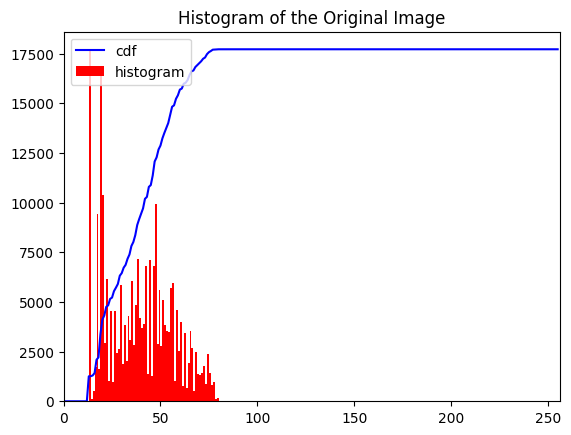

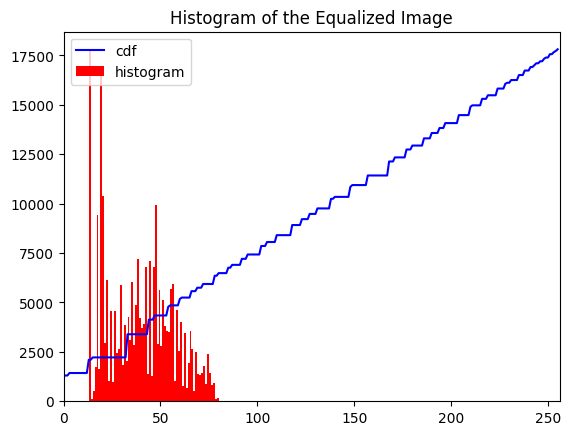

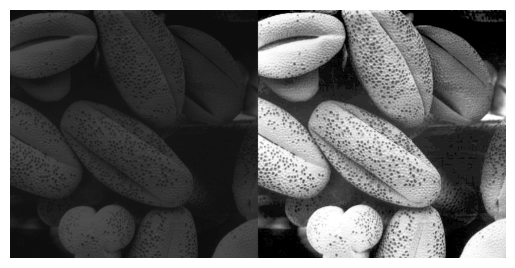

In [34]:
%matplotlib inline
import numpy as np
import matplotlib.pyplot as plt
import cv2 as cv

img=cv.imread('shells.tif',cv.IMREAD_GRAYSCALE)

hist,bins=np.histogram(img.ravel(),256,[0,256])
cdf=hist.cumsum()
cdf_normalized=cdf*hist.max()/cdf.max()

plt.plot(cdf_normalized,color='b')
plt.hist(img.flatten(),256,[0,256],color='r')
plt.xlim([0,256])
plt.legend(('cdf','histogram'),loc='upper left')
plt.title('Histogram of the Original Image')
plt.show()

equ=cv.equalizeHist(img)
hist,bins=np.histogram(equ.ravel(),256,[0,256])
cdf=hist.cumsum()
cdf_normalized=cdf*hist.max()/cdf.max()

plt.plot(cdf_normalized,color='b')
plt.hist(img.flatten(),256,[0,256],color='r')
plt.xlim([0,256])
plt.legend(('cdf','histogram'),loc='upper left')
plt.title('Histogram of the Equalized Image')
plt.show()

res=np.hstack((img,equ))
plt.axis('off')
plt.imshow(res,cmap='gray')

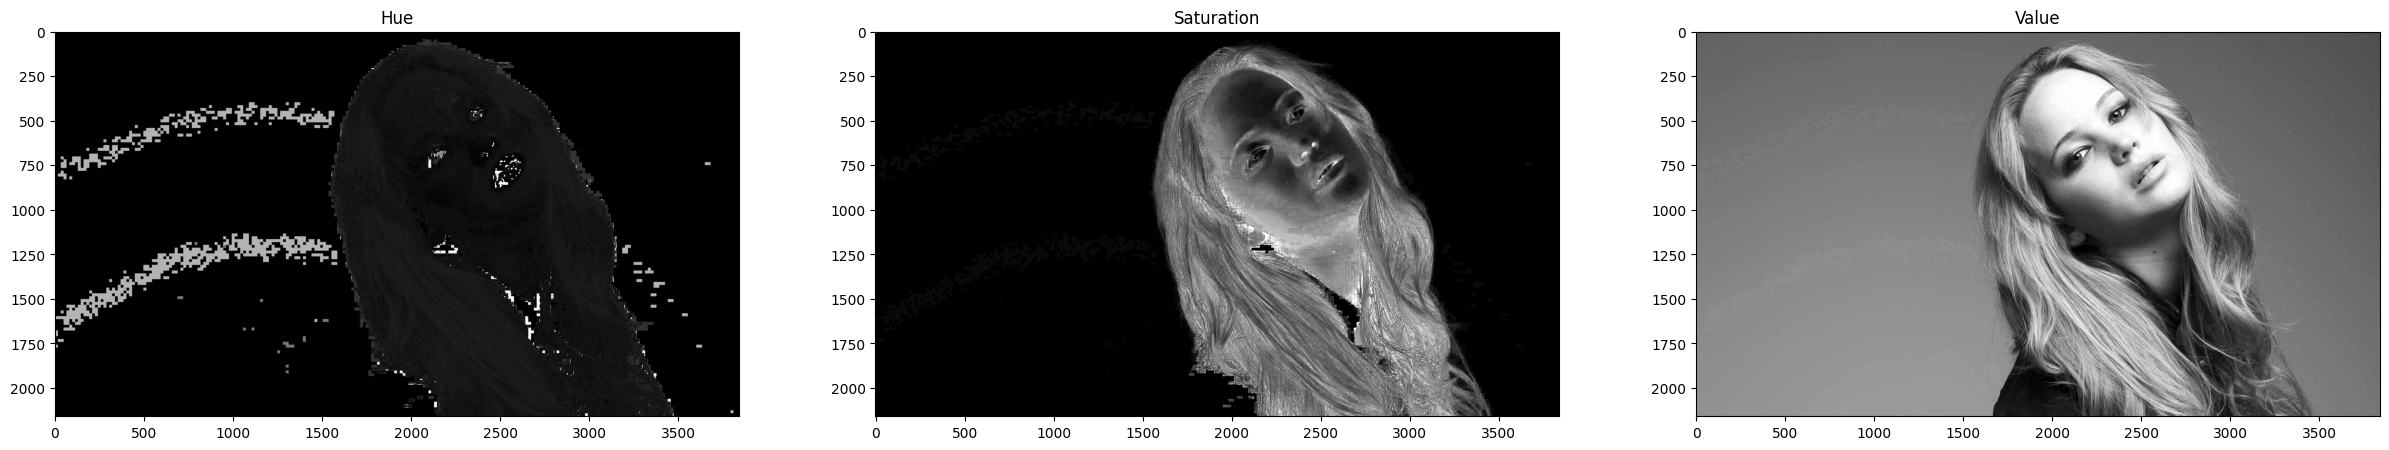

In [41]:
%matplotlib inline
import numpy as np
import matplotlib.pyplot as plt
import cv2 as cv

img_original=cv.imread('jeniffer.jpg',cv.IMREAD_COLOR)
img_hsv=cv.cvtColor(img_original,cv.COLOR_BGR2HSV)
h,s,v=cv.split(img_hsv)

plt.figure(figsize=(30, 10))

plt.subplot(1, 3, 1)
plt.imshow(h,cmap='gray')
plt.title('Hue')

plt.subplot(1, 3, 2)
plt.imshow(s,cmap='gray')
plt.title('Saturation')

plt.subplot(1, 3, 3)
plt.imshow(v,cmap='gray')
plt.title('Value')

plt.show()


